In [2]:
import pandas as pd
import seaborn as sns
import statsmodels as sm
import statsmodels.api as sma
from patsy import dmatrices
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as npr
import math
import scipy.stats as ss
sns.set(font_scale = 2.5)
plt.rcParams['figure.figsize'] = (12, 9)

Here we examine whether and how epidemics went extinct over a maximum period of 730 days, starting with 1 infection and according to global social distancing associated with Scenarios A to E (as of May 28). We assume that between 0.1 and 0.5 infections are detected and assume 100% uptake of isolation among traced households and 100% adherence to isolation over time. 

Note that if an epidemic acquired 1000 or node infections it was ended as they were growing exponentially and would not go extinct.


In [3]:
scenA = pd.read_excel("Data/Extinction Times/1_infection_scenA.xlsx", index_col = 0)
scenB = pd.read_excel("Data/Extinction Times/1_infection_scenB.xlsx", index_col = 0)
scenC = pd.read_excel("Data/Extinction Times/1_infection_scenC.xlsx", index_col = 0)
scenD = pd.read_excel("Data/Extinction Times/1_infection_scenD.xlsx", index_col = 0)
scenE = pd.read_excel("Data/Extinction Times/1_infection_scenE.xlsx", index_col = 0)

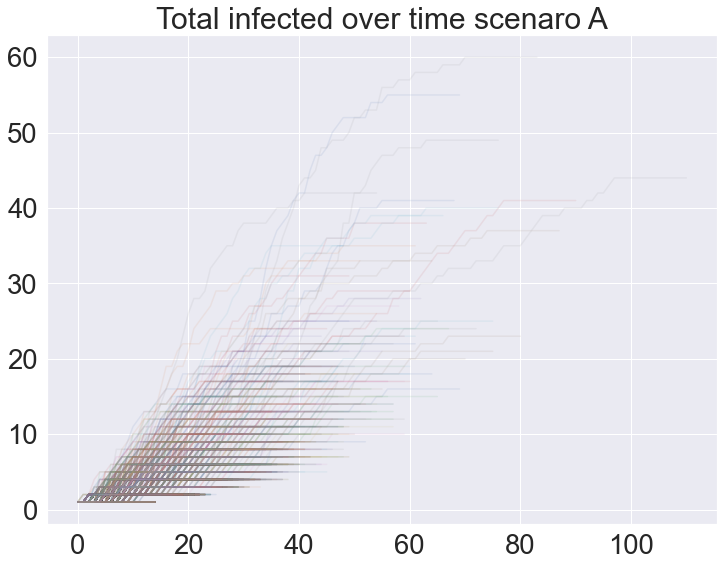

In [4]:
days_simulated_scenA = max(scenA.extinction_time)
infection_counts = [str(i) for i in range(days_simulated_scenA)]
infection_counts = scenA[infection_counts]

for _ in range(scenA.shape[0]):
    plt.plot(range(days_simulated_scenA), infection_counts.iloc[_], alpha = 0.1)
plt.title("Total infected over time scenaro A")
plt.show()

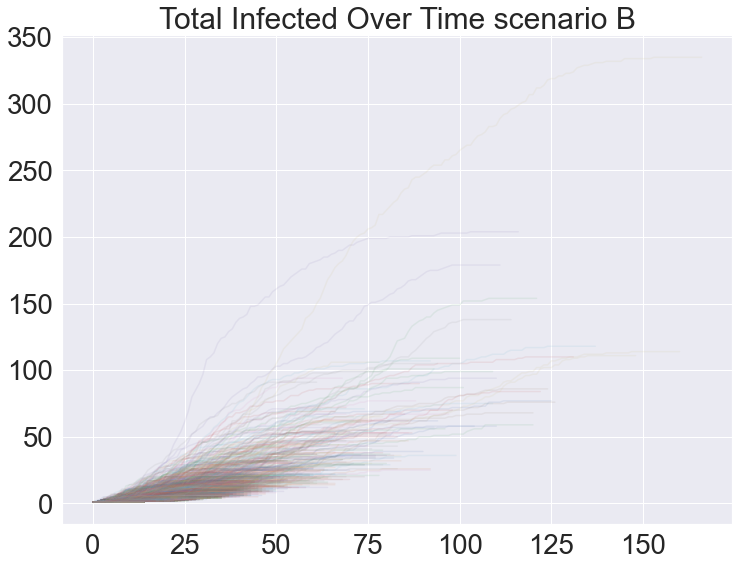

In [5]:
days_simulated_scenB = max(scenB.extinction_time)
infection_counts = [str(i) for i in range(days_simulated_scenB)]
infection_counts = scenB[infection_counts]


for _ in range(scenB.shape[0]):
    plt.plot(range(days_simulated_scenB), infection_counts.iloc[_], alpha = 0.1)
plt.title("Total Infected Over Time scenario B")
plt.show()

In [6]:
days_simulated_scenC = max(scenC.extinction_time)
infection_counts = [str(i) for i in range(days_simulated_scenC)]
infection_counts = scenC[infection_counts]

for _ in range(scenC.shape[0]):
    plt.plot(range(days_simulated_scenC), infection_counts.iloc[_], alpha = 0.1)
plt.title("Total Infected Over Time Scenario C")
plt.show()

KeyboardInterrupt: 

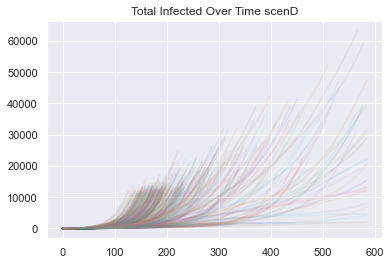

In [6]:
days_simulated_scenD = max(scenD.extinction_time)
infection_counts = [str(i) for i in range(days_simulated_scenD)]
infection_counts = scenD[infection_counts]

for _ in range(scenD.shape[0]):
    plt.plot(range(days_simulated_scenD), infection_counts.iloc[_], alpha = 0.1)
plt.title("Total Infected Over Time scenD")
plt.show()

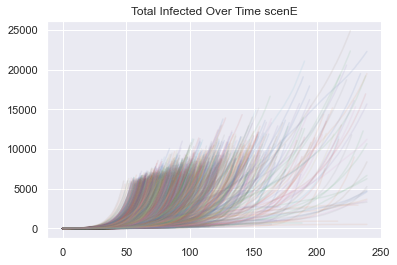

In [7]:
days_simulated_scenE = max(scenE.extinction_time)
infection_counts = [str(i) for i in range(days_simulated_scenE)]
infection_counts = scenE[infection_counts]

for _ in range(scenE.shape[0]):
    plt.plot(range(days_simulated_scenE), infection_counts.iloc[_], alpha = 0.1)
plt.title("Total Infected Over Time scenE")
plt.show()

In [8]:
scenA['end_state'] = scenA['end_reason'] 
scenA['end_state']
scenA.loc[scenA.extinction_time == 15, ['end_state']] = 'extinct15'
scenA_15 = scenA.loc[scenA['extinction_time'] != 15]
reason_tab = pd.crosstab(index=scenA["end_state"],     
                      columns="count")
print(reason_tab)
reason_tab/reason_tab.sum()

col_0      count
end_state       
extinct     2708
extinct15   2292


col_0       count
end_state        
extinct    0.5416
extinct15  0.4584

Text(0, 0.5, 'Density')

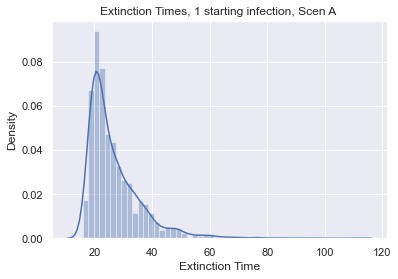

In [9]:
sns.distplot(scenA_15["extinction_time"])
plt.title("Extinction Times, 1 starting infection, Scen A ")
plt.xlabel("Extinction Time")
#plt.savefig('..\Figures\Extinction Times\Lockdown Relaxations\1_infection_scenA.svg')
plt.ylabel("Density")

In [9]:
scenB['end_state'] = scenB['end_reason'] 
scenB.loc[scenB.extinction_time == 15, ['end_state']] = 'extinct15'
scenB_15 = scenB.loc[scenB['extinction_time'] != 15]
reason_tab_p2s1 = pd.crosstab(index=scenB["end_state"],     
                      columns="count")
print(reason_tab_p2s1)
reason_tab_p2s1/reason_tab_p2s1.sum()

col_0      count
end_state       
extinct     3010
extinct15   1990


col_0      count
end_state       
extinct    0.602
extinct15  0.398

Text(0, 0.5, 'Density')

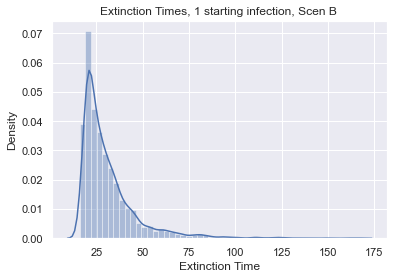

In [11]:
sns.distplot(scenB_15["extinction_time"])
plt.title("Extinction Times, 1 starting infection, Scen B ")
plt.xlabel("Extinction Time")
#plt.savefig('..\Figures\Extinction Times\Lockdown Relaxations\1_infection_scenB.svg')
plt.ylabel("Density")

In [10]:
scenC['end_state'] = scenC['end_reason'] 
scenC.loc[scenC.extinction_time == 15, ['end_state']] = 'extinct15'
scenC_15 = scenC.loc[scenC['extinction_time'] != 15]
reason_tab_p2s1 = pd.crosstab(index=scenC["end_state"],     
                      columns="count")
print(reason_tab_p2s1)
reason_tab_p2s1/reason_tab_p2s1.sum()

col_0        count
end_state         
extinct       3202
extinct15     1766
more_than_X     14
timed_out       18


col_0         count
end_state          
extinct      0.6404
extinct15    0.3532
more_than_X  0.0028
timed_out    0.0036

Text(0, 0.5, 'Density')

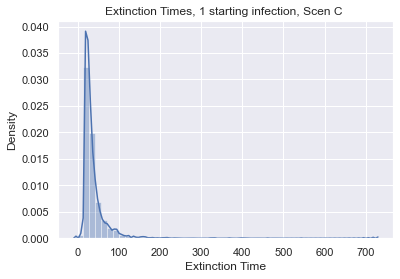

In [13]:
sns.distplot(scenC_15["extinction_time"])
plt.title("Extinction Times, 1 starting infection, Scen C ")
plt.xlabel("Extinction Time")
#plt.savefig('..\Figures\Extinction Times\Lockdown Relaxations\1_infection_scenC.svg')
plt.ylabel("Density")

In [11]:
scenD['end_state'] = scenD['end_reason'] 
scenD.loc[scenD.extinction_time == 15, ['end_state']] = 'extinct15'
scenD_15 = scenD.loc[scenD['extinction_time'] != 15]
reason_tab_p2s1 = pd.crosstab(index=scenD["end_state"],     
                      columns="count")
print(reason_tab_p2s1)
reason_tab_p2s1/reason_tab_p2s1.sum()

col_0        count
end_state         
extinct       3078
extinct15     1524
more_than_X    390
timed_out        8


col_0         count
end_state          
extinct      0.6156
extinct15    0.3048
more_than_X  0.0780
timed_out    0.0016

Text(0, 0.5, 'Density')

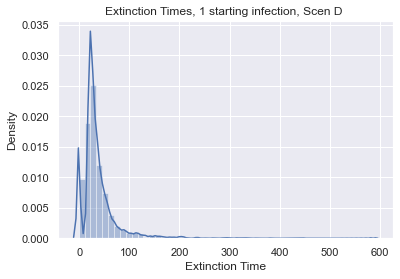

In [15]:
sns.distplot(scenD_15["extinction_time"])
plt.title("Extinction Times, 1 starting infection, Scen D ")
plt.xlabel("Extinction Time")
#plt.savefig('..\Figures\Extinction Times\Lockdown Relaxations\1_infection_scenB.svg')
plt.ylabel("Density")

In [12]:
scenE['end_state'] = scenE['end_reason'] 
scenE.loc[scenE.extinction_time == 15, ['end_state']] = 'extinct15'
scenE_15 = scenE.loc[scenE['extinction_time'] != 15]
reason_tab_E = pd.crosstab(index=scenE["end_state"],     
                      columns="count")
print(reason_tab_E)
reason_tab_E/reason_tab_E.sum()

col_0        count
end_state         
extinct       1806
extinct15     1029
more_than_X   2165


col_0         count
end_state          
extinct      0.3612
extinct15    0.2058
more_than_X  0.4330

Text(0, 0.5, 'Density')

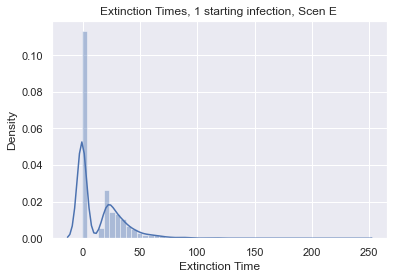

In [17]:
sns.distplot(scenE_15["extinction_time"])
plt.title("Extinction Times, 1 starting infection, Scen E ")
plt.xlabel("Extinction Time")
#plt.savefig('..\Figures\Extinction Times\Lockdown Relaxations\1_infection_scenE.svg')
plt.ylabel("Density")

In [18]:
max(scenE_15["extinction_time"])

240

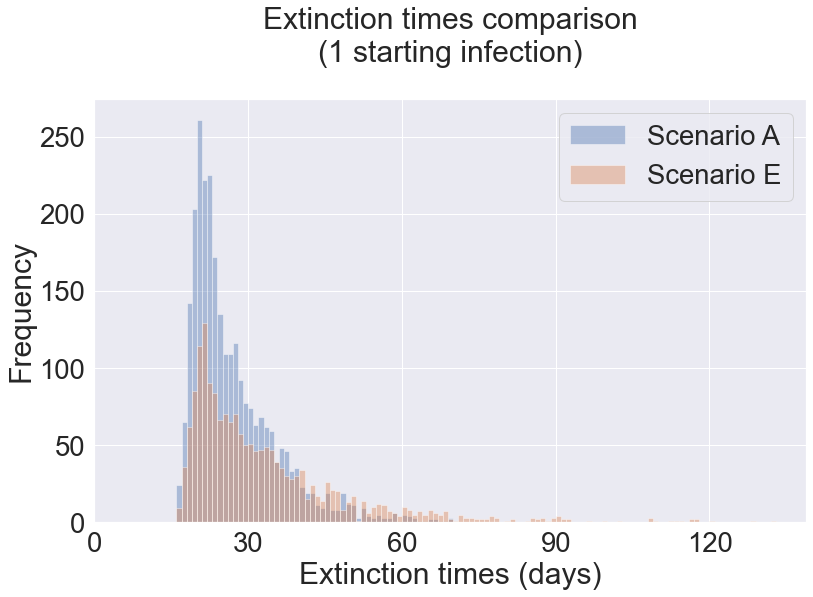

In [24]:
sns.distplot(scenA_15["extinction_time"], kde = False, bins = range(15, 71))
sns.distplot(scenE_15["extinction_time"], kde = False, bins = range(15, 134))
plt.legend(("Scenario A",
            "Scenario E"))
plt.xlabel("Extinction times (days)")
plt.ylabel("Frequency")
plt.title("Extinction times comparison\n(1 starting infection)\n")
plt.xticks([0, 30, 60, 90, 120])
plt.tight_layout()
plt.savefig("Figures/Extinction Times/Lockdown Relaxations/Comparison_A_E_1inf.jpg")
plt.savefig("Figures/Extinction Times/Lockdown Relaxations/Comparison_A_E_1inf.pdf")
plt.savefig("Figures/Extinction Times/Lockdown Relaxations/Comparison_A_E_1inf.png")

In [20]:
# Need to be clear that not quite comparing like with like because 
# in Scen E many more epidemics do not go extinct but keep growing exponentially

print(scenA_15.groupby('end_state').size())
print(scenE_15.groupby('end_state').size())

end_state
extinct    2708
dtype: int64
end_state
extinct        1806
more_than_X    2165
dtype: int64


In [20]:
help(plt.xticks)

Help on function xticks in module matplotlib.pyplot:

xticks(ticks=None, labels=None, **kwargs)
    Get or set the current tick locations and labels of the x-axis.
    
    Pass no arguments to return the current values without modifying them.
    
    Parameters
    ----------
    ticks : array-like, optional
        The list of xtick locations.  Passing an empty list removes all xticks.
    labels : array-like, optional
        The labels to place at the given *ticks* locations.  This argument can
        only be passed if *ticks* is passed as well.
    **kwargs
        `.Text` properties can be used to control the appearance of the labels.
    
    Returns
    -------
    locs
        The list of xtick locations.
    labels
        The list of xlabel `.Text` objects.
    
    Notes
    -----
    Calling this function with no arguments (e.g. ``xticks()``) is the pyplot
    equivalent of calling `~.Axes.get_xticks` and `~.Axes.get_xticklabels` on
    the current axes.
    Calling this